<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/Tutoria_6_regresion_lineal_g80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

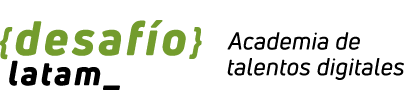

In [1]:
## ejemplo guia de estudio

import numpy as np #tambien importamos numpy
import pandas as pd #tambien importamos Pandas
import statsmodels.api as sm

In [2]:
#crear datos
np.random.seed(42)
X = np.random.rand(100,1)
y = 2*X + np.random.rand(100,1)

data = pd.DataFrame({'X': X.flatten(),
                     'y':y.flatten()})


data.head()

,X,y
0,0.374540,0.780509
1,0.950714,2.537839
2,0.731994,1.778344
3,0.598658,1.705888
4,0.156019,1.219604


In [3]:
X = sm.add_constant(X)
X

array([[1.        , 0.37454012],
       [1.        , 0.95071431],
       [1.        , 0.73199394],
       [1.        , 0.59865848],
       [1.        , 0.15601864],
       [1.        , 0.15599452],
       [1.        , 0.05808361],
       [1.        , 0.86617615],
       [1.        , 0.60111501],
       [1.        , 0.70807258],
       [1.        , 0.02058449],
       [1.        , 0.96990985],
       [1.        , 0.83244264],
       [1.        , 0.21233911],
       [1.        , 0.18182497],
       [1.        , 0.18340451],
       [1.        , 0.30424224],
       [1.        , 0.52475643],
       [1.        , 0.43194502],
       [1.        , 0.29122914],
       [1.        , 0.61185289],
       [1.        , 0.13949386],
       [1.        , 0.29214465],
       [1.        , 0.36636184],
       [1.        , 0.45606998],
       [1.        , 0.78517596],
       [1.        , 0.19967378],
       [1.        , 0.51423444],
       [1.        , 0.59241457],
       [1.        , 0.04645041],
       [1.

In [4]:
## crear modelo
modelo = sm.OLS(y,X).fit()

In [5]:
## conocer resultados del modelo

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     390.8
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           5.68e-36
Time:                        13:59:16   Log-Likelihood:                -18.613
No. Observations:                 100   AIC:                             41.23
Df Residuals:                      98   BIC:                             46.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5136      0.055      9.293      0.0

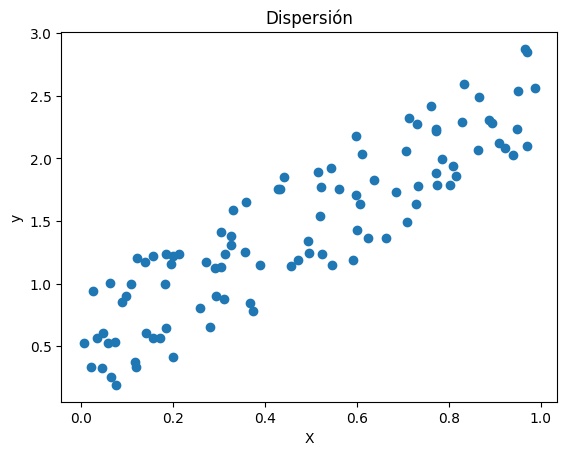

In [6]:
import matplotlib.pyplot as plt


plt.scatter(data['X'],data['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dispersión')
plt.show()

In [7]:
predictions = modelo.predict(X)
predictions

array([1.25011895, 2.38314726, 1.95304058, 1.69084062, 0.82040338,
       0.82035594, 0.62781724, 2.21690564, 1.69567131, 1.90599997,
       0.55407641, 2.42089469, 2.15056977, 0.9311558 , 0.8711507 ,
       0.87425682, 1.1118804 , 1.54551457, 1.36300387, 1.08629054,
       1.71678701, 0.78790792, 1.08809086, 1.23403663, 1.41044485,
       2.05762134, 0.90624983, 1.52482341, 1.67856216, 0.60494092,
       1.70831538, 0.84892795, 0.64151956, 2.37955104, 2.41248249,
       2.10328546, 1.11261099, 0.70566678, 1.85912025, 1.37914361,
       0.75358198, 1.48734738, 0.58122159, 2.30174745, 1.0224803 ,
       1.81642676, 1.12656762, 1.53629496, 1.58868612, 0.87710809,
       2.42025515, 2.03787183, 2.3610926 , 2.27324733, 1.68934904,
       2.32643417, 0.68761536, 0.89899175, 0.60253569, 1.15334946,
       1.27791925, 1.04719694, 2.14328374, 1.21514178, 1.06604648,
       1.58079233, 0.79072069, 2.09109263, 0.66019914, 2.45427959,
       2.03219256, 0.90436576, 0.52445672, 2.11717675, 1.90361

In [8]:
len(predictions), len(X)

(100, 100)

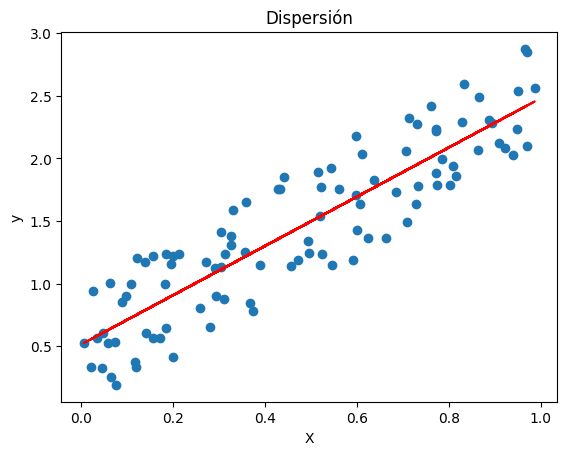

In [9]:
plt.scatter(data['X'],data['y'])
plt.plot(data['X'],predictions, color = 'red', label = 'regresión lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dispersión')
plt.show()

In [10]:
new = [1,2,5,10,-5]

new = sm.add_constant(new)

predict_2 = modelo.predict(new)
predict_2

array([ 2.48006601,  4.44653437, 10.34593944, 20.17828122, -9.31874412])

In [11]:
## metricas de error
mae = abs(y-predictions).mean()
print(f"el error absoluto es: {mae}")

el error absoluto es: 0.7121523569223451


In [12]:
## error cuadratico medio
mse = ((y-predictions)**2).mean()
print(f"Error cuadrantico medio es: {mse}")

Error cuadrantico medio es: 0.7625701909046638


In [15]:
## raiz del error cuadratico
rmse = (((y-predictions)**2).mean())**0.5
print(f'Raiz de error cuadratico medio: {rmse}')

Raiz de error cuadratico medio: 0.8732526500988496


#<center><font color="green">Regresión (parte I)</font></center>

##<font color="green">Matriz de correlaciones</font>

Python nos permite determinar fácilmente las correlaciones entre cada par de variables contenidas en un dataset. En nuestro caso, utilizaremos los datos correspondientes a la base de datos de los pingüinos que vimos en la sesión anterior.


In [ ]:
#cargamos las bibliotecas y la data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing

# Cargar el conjunto de datos de pingüinos de seaborn
penguins = sns.load_dataset("penguins")

# Filtrar los datos sin valores faltantes
data = penguins.dropna()


<ipython-input-38-e21a93f463f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap=plt.cm.PuBu)


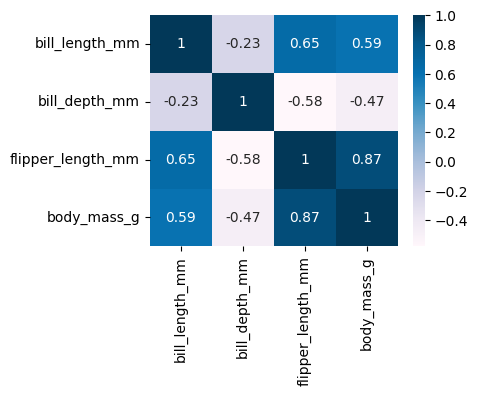

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.PuBu)
'''
PuBu utiliza una gamna de colores en púrpura. Otras alternativas son:
- Viridis (cmap=plt.cm.viridis): es especialmente útil para representar datos
cuantitativos. Tiene una transición suave y uniforme de colores, lo que facilita
la interpretación de las relaciones.

- Coolwarm (cmap=plt.cm.coolwarm): Este es un mapa de color divergente que va
desde colores fríos (azules) a colores cálidos (rojos). Puede ser útil cuando
deseas resaltar diferencias positivas y negativas en tus datos.

- Greens (cmap=plt.cm.Greens): en tonos de verde

Reds (cmap=plt.cm.Reds): En tonos rojos

YlGnBu (cmap=plt.cm.YlGnBu): va desde amarillo hasta azul, pasando por tonos
verdes.

Pastel1 (cmap=plt.cm.Pastel1): Tonos pasteles

Accent (cmap=plt.cm.Accent): Tonos brillantes
'''
plt.show()

<center><strong>¡Podemos regresar a nuestra presentación!</strong></center>

##<font color="green">Regresión lineal simple</font>


Vamos a analizar, a partir de nuestra base de datos, las posibles relaciones entre las variables que presenta.

In [ ]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Vamos a examinar primero la posible relación entre las variables. Crearemos ahora un scatterplot, para visualizar la distribución de los pesos y largos de las aletas. Para ello, primero seleccionaremos esas columnas.

In [ ]:
# Filtrar las columnas necesarias
data1 = data[["flipper_length_mm", "body_mass_g"]]

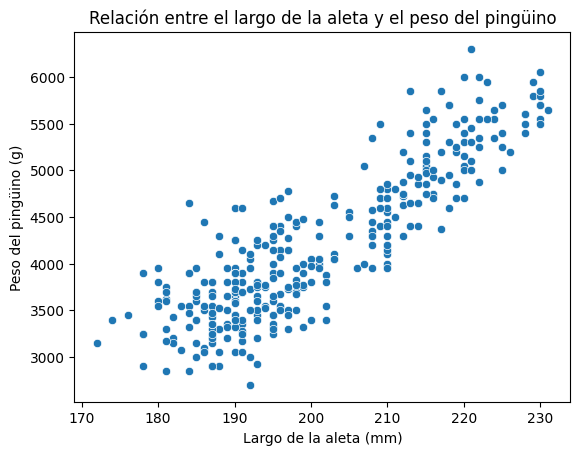

In [ ]:
# Crear una gráfica de dispersión
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data=data1)
plt.title("Relación entre el largo de la aleta y el peso del pingüino")
plt.xlabel("Largo de la aleta (mm)")
plt.ylabel("Peso del pingüino (g)")
plt.show()

Intuitivamente, parece haber una correlación lineal positiva que verificaremos a continuación.

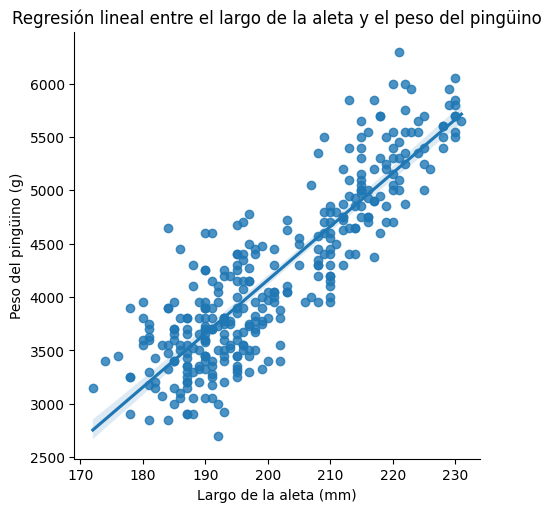

Pendiente: 50.15326594224111
Intercepto: -5872.092682842823
Error estándar: 1.5402309838246344
Coef. de correlación: 0.8729788985653613


In [ ]:
# Realizar la regresión lineal
sns.lmplot(x="flipper_length_mm", y="body_mass_g", data=data1)
plt.title("Regresión lineal entre el largo de la aleta y el peso del pingüino")
plt.xlabel("Largo de la aleta (mm)")
plt.ylabel("Peso del pingüino (g)")

# Calcular los valores de la regresión lineal. Ya veremos el significado de los parámetros
slope, intercept, r_value, p_value, std_err = stats.linregress(data["flipper_length_mm"], data["body_mass_g"])

# Mostrar el gráfico completo
plt.show()

print(f"Pendiente: {slope}")
print(f"Intercepto: {intercept}")
print(f"Error estándar: {std_err}")
print(f"Coef. de correlación: {r_value}")

Podemos analizar ahora lo que ocurre con los residuos, lo que más adelante nos permitirá evaluar nuestro modelo.

Pendiente: 50.15326594224111
Intercepto: -5872.092682842823
Error estándar: 1.5402309838246344
Coef. de correlación: 0.8729788985653613


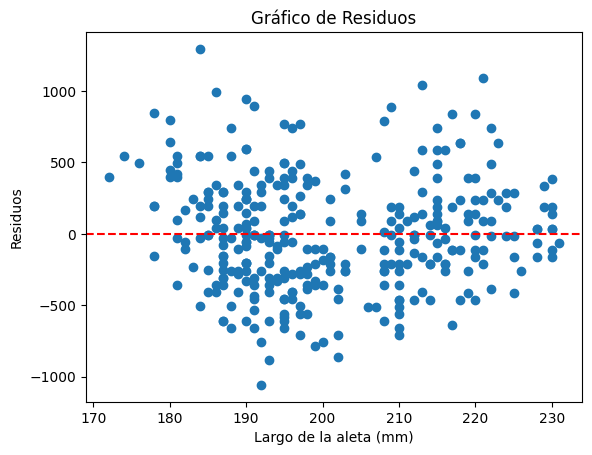

In [ ]:
residuals = data["body_mass_g"] - (slope * data["flipper_length_mm"] + intercept)

# Mostrar un gráfico de los residuos
plt.figure()
plt.scatter(data["flipper_length_mm"], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de Residuos")
plt.xlabel("Largo de la aleta (mm)")
plt.ylabel("Residuos")
plt.show()

Podríamos ver algo más aquí sobre regresión lineal múltiple, pero para ello necesitaremos algunas herramientas más.

##<font color = 'green'>Modelo de regresión lineal con Statsmodels</font>

Utilizaremos un módulo llamado statsmodels, que tiene documentación[ aquí](https://www.statsmodels.org/stable/gettingstarted.html).

El módulo statsmodels proporciona una amplia variedad de estadísticas de salida y parámetros de ajuste. Consulta la documentación completa de la regresión statsmodels [aquí](https://www.statsmodels.org/stable/regression.html).

Statsmodels contiene una función llamada .OLS() para realizar una regresión, buscando minimizar los cuadrados de los residuos. Un detalle importante es que se necesita agregar una columna de "1" a las variables predictoras, ya que esto (por motivos más largos de explicar) permite realizar un mejor ajuste del modelo.

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          3.13e-105
Time:                        12:40:41   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5872.0927    310.28

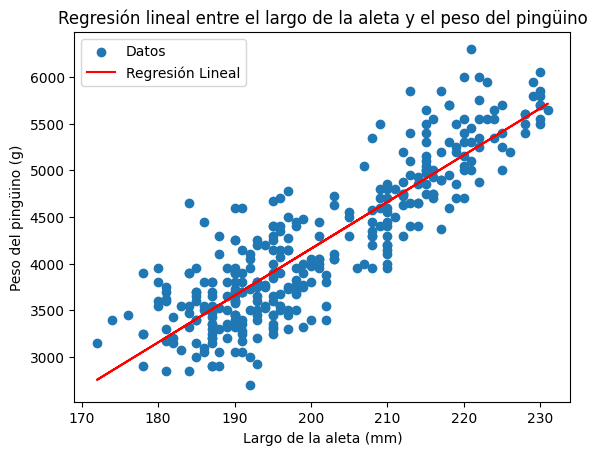

In [ ]:
import statsmodels.api as sm

#Definir las variables predictoras (X) y la variable de respuesta (y)
X = data["flipper_length_mm"]
y = data["body_mass_g"]

# Agregar una constante al predictor (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los resultados del modelo
results = model.summary()

# Imprimir los resultados
print(results)

# Graficar la regresión lineal
plt.scatter(data["flipper_length_mm"], data["body_mass_g"], label="Datos")
plt.plot(data["flipper_length_mm"], model.predict(X), color='red', label="Regresión Lineal")
plt.title("Regresión lineal entre el largo de la aleta y el peso del pingüino")
plt.xlabel("Largo de la aleta (mm)")
plt.ylabel("Peso del pingüino (g)")
plt.legend()
plt.show()



Podemos aplicar statsmodels para obtener un modelo de regresión para dos o más variables independientes. En nuestro caso, vamos a definir como variables independientes el largo de la aleta y el sexo; para esto último deberemos transformar esta variable categórica en numerica utilizando get.dummies

In [ ]:

# Paso 1: Definir variables predictoras (X) y variable de respuesta (y)
X = data[['flipper_length_mm', 'sex']]  # Largo de la aleta y sexo como variables independientes
y = data['body_mass_g']  # Peso como variable dependiente

# Codificar la variable categórica 'sex' usando get dummies
X_encoded = pd.get_dummies(X, columns=['sex'], prefix=['sex'])

# Paso 2: Agregar una constante (intercepto) a las variables predictoras
X_encoded = sm.add_constant(X_encoded)

# Paso 3: Crear el modelo de regresión lineal
model = sm.OLS(y, X_encoded).fit()

# Paso 4: Obtener resultados del modelo
results = model.summary()

predictions = model.predict(X_encoded)

# Calcular el Error Cuadrático Medio (MSE)
mse = ((y - predictions) ** 2).mean()

# Calcular el Error Cuadrático Medio Explicado (EMSE)
emse = mse / ((y - y.mean()) ** 2).mean()

# Obtener el valor R² del modelo
r2 = model.rsquared

print(results)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Error Mean Squared Explicado (EMSE): {emse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          3.53e-118
Time:                        12:42:23   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3490.9167    193.50

¿Cómo podemos interpretar los resultados que nos entrega statsmodels?



<center><strong>¡Ahora podemos regresar a nuestra presentación!<center><strong>




##<font color = 'green'>Analizando el modelo</font>

Construiremos ahora un modelo para comparar los largos de las aletas y los pesos, pero separando entre pingüinos machos y hembras, para luego analizar el modelo conjunto.

In [ ]:
# Eliminar filas con valores faltantes
data_cleaned = data.dropna(subset=['body_mass_g', 'flipper_length_mm'])

# Filtrar los datos por género (macho y hembra)
pinguinos_macho = data_cleaned[data_cleaned['sex'] == 'Male']
pinguinos_hembra = data_cleaned[data_cleaned['sex'] == 'Female']

# Crear modelos de regresión lineal para cada género y para ambos juntos
model_macho = sm.OLS(pinguinos_macho['flipper_length_mm'], sm.add_constant(pinguinos_macho['body_mass_g'])).fit()
model_hembra = sm.OLS(pinguinos_hembra['flipper_length_mm'], sm.add_constant(pinguinos_hembra['body_mass_g'])).fit()
model_ambos = sm.OLS(data_cleaned['flipper_length_mm'], sm.add_constant(data_cleaned['body_mass_g'])).fit()

# Obtener las predicciones de cada modelo
predictions_macho = model_macho.predict()
predictions_hembra = model_hembra.predict()
predictions_ambos = model_ambos.predict()

# Calcular el Error Cuadrático Medio (MSE) para cada modelo
mse_macho = ((pinguinos_macho['flipper_length_mm'] - predictions_macho) ** 2).mean()
mse_hembra = ((pinguinos_hembra['flipper_length_mm'] - predictions_hembra) ** 2).mean()
mse_ambos = ((data_cleaned['flipper_length_mm'] - predictions_ambos) ** 2).mean()

# Calcular el Error Cuadrático Medio Explicado (EMSE) para cada modelo
emse_macho = mse_macho / ((pinguinos_macho['flipper_length_mm'] - pinguinos_macho['flipper_length_mm'].mean()) ** 2).mean()
emse_hembra = mse_hembra / ((pinguinos_hembra['flipper_length_mm'] - pinguinos_hembra['flipper_length_mm'].mean()) ** 2).mean()
emse_ambos = mse_ambos / ((data_cleaned['flipper_length_mm'] - data_cleaned['flipper_length_mm'].mean()) ** 2).mean()

# Calcular el Coeficiente de Determinación (R²) para cada modelo
r2_macho = model_macho.rsquared
r2_hembra = model_hembra.rsquared
r2_ambos = model_ambos.rsquared

# Calcular el Error Absoluto Medio (MAE) para cada modelo
mae_macho = (abs(pinguinos_macho['flipper_length_mm'] - predictions_macho)).mean()
mae_hembra = (abs(pinguinos_hembra['flipper_length_mm'] - predictions_hembra)).mean()
mae_ambos = (abs(data_cleaned['flipper_length_mm'] - predictions_ambos)).mean()


# Mostrar los resultados
print("Modelo para pingüinos macho:")
print(f"R²: {r2_macho:.2f}, MSE: {mse_macho:.2f}, EMSE: {emse_macho:.2f}, MAE: {mae_macho:.2f}")

print("\nModelo para pingüinos hembra:")
print(f"R²: {r2_hembra:.2f}, MSE: {mse_hembra:.2f}, EMSE: {emse_hembra:.2f}, MAE: {mae_hembra:.2f}")

print("\nModelo para ambos géneros juntos:")
print(f"R²: {r2_ambos:.2f}, MSE: {mse_ambos:.2f}, EMSE: {emse_ambos:.2f}, MAE: {mae_ambos:.2f}")


Modelo para pingüinos macho:
R²: 0.75, MSE: 52.79, EMSE: 0.25, MAE: 6.04

Modelo para pingüinos hembra:
R²: 0.78, MSE: 33.72, EMSE: 0.22, MAE: 4.59

Modelo para ambos géneros juntos:
R²: 0.76, MSE: 46.59, EMSE: 0.24, MAE: 5.56


Analizando las mpetricas obtenidas tenemos que:

* El Coeficiente de Determinación (R²) indica la proporción de la variabilidad total en la variable dependiente que es explicada por el modelo. Cuanto más cercano a 1 sea el R², mejor es el ajuste del modelo a los datos. En este sentido, podemos ver que los modelos son similares en cuanto a nivel de ajuste.

*  El Error Cuadrático Medio (MSE) mide la magnitud promedio de los errores cuadrados entre las predicciones del modelo y los valores reales. Un MSE más bajo indica que el modelo tiene errores más pequeños y, por lo tanto, es mejor en términos de precisión. En este sentido, el modelo para las pingüinos hembra es notoriamente más preciso que los otros dos.

* El Error Cuadrático Medio Explicado (EMSE) es una variante del MSE que normaliza el error al dividirlo por la varianza de la variable dependiente. Permite comparar modelos en términos de la capacidad del modelo para explicar la variabilidad en los datos en relación con la varianza natural de los datos.
Un EMSE más bajo indica que el modelo es mejor para explicar la variabilidad en los datos. En este sentido, el modelo para las hembras es levemente mejor que los demás.

* El Error Absoluto Medio (MAE) mide la magnitud promedio de los errores absolutos entre las predicciones del modelo y los valores reales.
Es menos sensible a valores atípicos que el MSE, ya que no eleva los errores al cuadrado. Un modelo con un MAE más bajo se considera mejor en términos de precisión.

Podemos graficar para observar las relaciones.



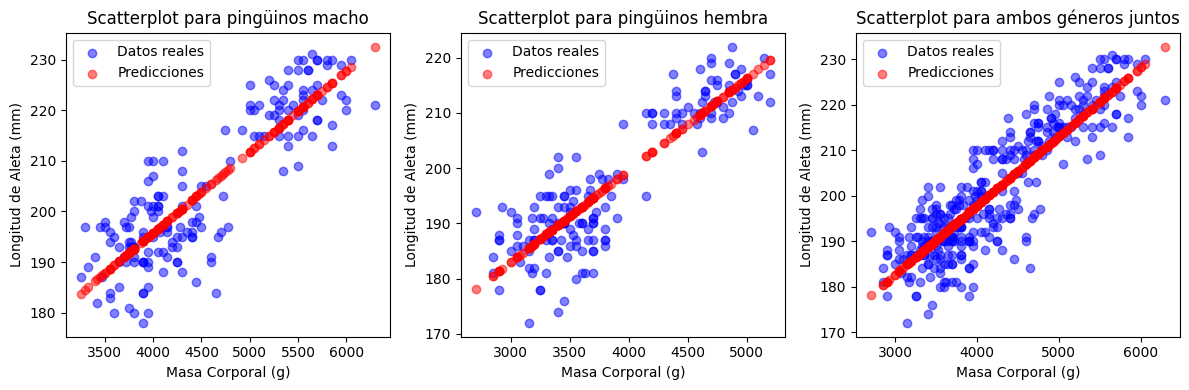

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(pinguinos_macho['body_mass_g'], pinguinos_macho['flipper_length_mm'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(pinguinos_macho['body_mass_g'], predictions_macho, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Longitud de Aleta (mm)')
plt.title('Scatterplot para pingüinos macho')
plt.legend()

# Scatterplot para los pingüinos hembra
plt.subplot(1, 3, 2)
plt.scatter(pinguinos_hembra['body_mass_g'], pinguinos_hembra['flipper_length_mm'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(pinguinos_hembra['body_mass_g'], predictions_hembra, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Longitud de Aleta (mm)')
plt.title('Scatterplot para pingüinos hembra')
plt.legend()

# Scatterplot para ambos géneros juntos
plt.subplot(1, 3, 3)
plt.scatter(data_cleaned['body_mass_g'], data_cleaned['flipper_length_mm'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(data_cleaned['body_mass_g'], predictions_ambos, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Longitud de Aleta (mm)')
plt.title('Scatterplot para ambos géneros juntos')
plt.legend()

# Mostrar los scatterplots
plt.tight_layout()
plt.show()